Implement Auto-Encoder for latent representation of MNIST dataset.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torch.utils import data
import torchvision.transforms as t
from torchvision.datasets import MNIST

In [2]:
EPOCHS = 20
BATCH_SIZE_TRAIN = 128
BATCH_SIZE_TEST = 1000
LR = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(100, 50),
            nn.Sigmoid(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(100, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

In [4]:
def train(model, train_loader, criterion, optimizer, device="cpu"):
    model.train()
    running_loss = 0.0
    for data, _ in train_loader:
        data = data.to(device)
        target = torch.empty_like(data).copy_(data)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    running_loss /= len(train_loader)
    return running_loss

def test(model, test_loader, criterion, device="cpu"):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            target = torch.empty_like(data).copy_(data)
            output = model(data)
            running_loss += criterion(output, target).item()
    running_loss /= len(test_loader)
    return running_loss

In [5]:
train_dataset = MNIST('data/', train=True, download=True, transform=t.ToTensor())
test_dataset = MNIST('data/', train=False, download=True, transform=t.ToTensor())

train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [6]:
model = AutoEncoder().to(DEVICE)

print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=100, out_features=50, bias=True)
    (4): Sigmoid()
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=100, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=100, out_features=784, bias=True)
    (4): Sigmoid()
  )
)


In [7]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [8]:
for epoch in range(1, EPOCHS + 1):
    print(f"Epoch: {epoch}")

    print("\tTraining: ", end='')
    train_loss = train(model, train_loader, criterion, optimizer, DEVICE)
    print("Loss: {:.6}".format(train_loss))

    print("\tTesting: ", end='')
    test_loss = test(model, test_loader, criterion, DEVICE)
    print("Loss: {:.6}".format(test_loss))

    print()


Epoch: 1
	Training: Loss: 0.274906
	Testing: Loss: 0.240623

Epoch: 2
	Training: Loss: 0.22373
	Testing: Loss: 0.198149

Epoch: 3
	Training: Loss: 0.194961
	Testing: Loss: 0.174708

Epoch: 4
	Training: Loss: 0.179424
	Testing: Loss: 0.160476

Epoch: 5
	Training: Loss: 0.170331
	Testing: Loss: 0.151488

Epoch: 6
	Training: Loss: 0.165131
	Testing: Loss: 0.145852

Epoch: 7
	Training: Loss: 0.161308
	Testing: Loss: 0.141956

Epoch: 8
	Training: Loss: 0.158807
	Testing: Loss: 0.138998

Epoch: 9
	Training: Loss: 0.156593
	Testing: Loss: 0.13658

Epoch: 10
	Training: Loss: 0.154885
	Testing: Loss: 0.134485

Epoch: 11
	Training: Loss: 0.15323
	Testing: Loss: 0.132469

Epoch: 12
	Training: Loss: 0.152026
	Testing: Loss: 0.130974

Epoch: 13
	Training: Loss: 0.150751
	Testing: Loss: 0.12955

Epoch: 14
	Training: Loss: 0.149782
	Testing: Loss: 0.128035

Epoch: 15
	Training: Loss: 0.148909
	Testing: Loss: 0.126947

Epoch: 16
	Training: Loss: 0.148291
	Testing: Loss: 0.126287

Epoch: 17
	Training: 

In [9]:
import matplotlib.pyplot as plt

In [10]:
NUM_COLUMNS = 5

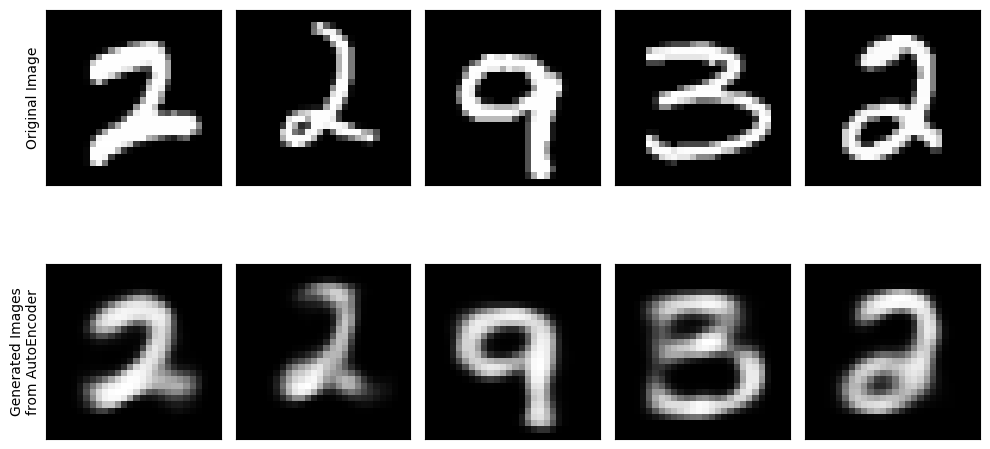

In [11]:
iterator = iter(test_loader)
data, _ = next(iterator)
out = model(data.to(DEVICE))

tensor2image = t.ToPILImage()

fig, axs = plt.subplots(2, NUM_COLUMNS, figsize=(10, 6))
axs[0, 0].set_ylabel('Original Image')
axs[1, 0].set_ylabel('Generated Images\nfrom AutoEncoder')
for i in range(NUM_COLUMNS):
    axs[0, i].imshow(tensor2image(data[i]), cmap = 'gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])

    axs[1, i].imshow(tensor2image(out[i]), cmap='gray')
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

plt.tight_layout()
plt.show()